## Random Forest

In [1]:
#import bibliotecas

import numpy as np
import pandas as pd

from sklearn import ensemble  as en
from sklearn import metrics   as mt

from matplotlib import pyplot as plt

### Datasets

In [2]:
X_train = pd.read_csv('X_training.csv')
y_train = pd.read_csv('y_training.csv') 
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')
X_val = pd.read_csv('X_validation.csv')
y_val = pd.read_csv('y_val.csv') 

In [10]:
X_val.head(2)

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.143252,0.025900,0.616,0.933,0.0000,0.000000,0.359,0.962307,0,0.0513,0.309853,0.8,0.806
1,0.363603,0.000188,0.490,0.972,0.0299,0.909091,0.368,0.765216,0,0.1110,-0.908089,0.8,0.376


In [3]:
# preparação dos dados 

y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

### Dados de Treino

In [13]:
np.arange(2,40,1)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])

In [4]:
md_list = np.arange(2,40,1)
rsme_list = []

for i in md_list:
    # define
    model = en.RandomForestRegressor( n_estimators = 50 , max_depth= i)
    
    # fit
    model.fit (X_train , y_train)
    
    #performance
    ypred = model.predict(X_train)
        
    #rsme 
    mse = round(mt.mean_squared_error( y_train , ypred),2)
    rmse = np.sqrt(mse)
    rsme_list.append(rmse)

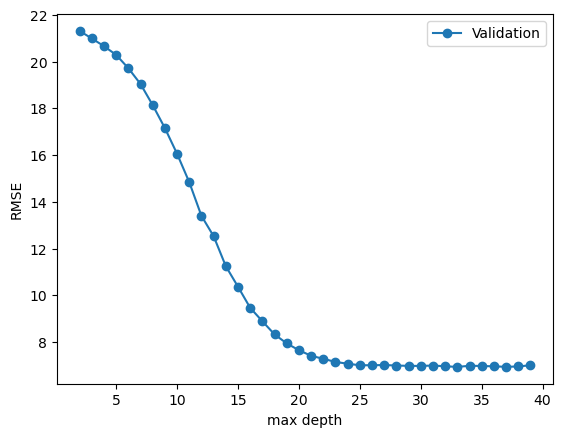

In [5]:
plt.plot( md_list, rsme_list, '-o', label='Validation' )
plt.xlabel('max depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

**definindo maxdepth:**

In [6]:
best_md = rsme_list.index(min(rsme_list))
best_md

31

In [7]:
#define
model = en.RandomForestRegressor(n_estimators = 50 , max_depth = best_md)

#fit
model.fit(X_train, y_train)

#perfomance
ypred_train = model.predict (X_train)

#R2 
r2 = round(mt.r2_score( y_train , ypred_train),3)
print( 'R2: {}'.format(r2))

#mse 
mse = round(mt.mean_squared_error( y_train , ypred_train),2)
print( 'MSE: {}'.format(mse))

#rmse
rmse = round(np.sqrt(mse),2)
print( 'RMSE: {}'.format(rmse))

#mae
mae = np.round(mt.mean_absolute_error( y_train , ypred_train), 2)
print('MAE: {}'.format( mae ))

#mape
mape = np.round(mt.mean_absolute_percentage_error( y_train , ypred_train), 2) 
print('MAPE: {}%'.format( mape ) )



R2: 0.898
MSE: 48.53
RMSE: 6.97
MAE: 4.94
MAPE: 2.59%


### Dados de Validação

In [8]:
#define
model = en.RandomForestRegressor(n_estimators = 50 , max_depth = best_md)

#fit
model.fit(X_train, y_train)

#perfomance
ypred_val = model.predict (X_val)

#R2 
r2 = round(mt.r2_score( y_val , ypred_val),3)
print( 'R2: {}'.format(r2))

#mse 
mse = round(mt.mean_squared_error( y_val , ypred_val),2)
print( 'MSE: {}'.format(mse))

#rmse
rmse = round(np.sqrt(mse),2)
print( 'RMSE: {}'.format(rmse))

#mae
mae = np.round(mt.mean_absolute_error( y_val , ypred_val), 2)
print('MAE: {}'.format( mae ))

#mape
mape = np.round(mt.mean_absolute_percentage_error( y_val , ypred_val), 2) 
print('MAPE: {}%'.format( mape ) )


R2: 0.324
MSE: 322.89
RMSE: 17.97
MAE: 13.1
MAPE: 7.06%


### Dados de Teste

In [27]:
#define
model = en.RandomForestRegressor(n_estimators = 50 , max_depth = best_md)

#fit
model.fit(np.concatenate((X_train, X_val)),
           np.concatenate((y_train, y_val)))

#perfomance
ypred_test = model.predict (X_test)

#R2 
r2 = round(mt.r2_score( y_test , ypred_test),3)
print( 'R2: {}'.format(r2))

#mse 
mse = round(mt.mean_squared_error( y_test , ypred_test),2)
print( 'MSE: {}'.format(mse))

#rmse
rmse = round(np.sqrt(mse),2)
print( 'RMSE: {}'.format(rmse))

#mae
mae = np.round(mt.mean_absolute_error( y_test , ypred_test), 2)
print('MAE: {}'.format( mae ))

#mape
mape = np.round(mt.mean_absolute_percentage_error( y_test , ypred_test), 2) 
print('MAPE: {}%'.format( mape ) )

R2: 0.397
MSE: 293.66
RMSE: 17.14
MAE: 12.34
MAPE: 6.35%


\\?\C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
